# Predicting Air temperature for 2019 for station PTIM4

We are using data from years 2011 to 2018 to predict the air temperature for year 2019


### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from glob import glob
from datetime import datetime

### Using glob to read multiple files at once. The output is a list of dataframes

In [2]:
filenames = glob('/Users/shrav/Downloads/Ice Cover/PTIM4/ptim4*.txt')
dataframes = [pd.read_csv(f, delim_whitespace = True, header = 0, skiprows = 1, 
                          dtype={'#yr': object, 'mo': object, 'dy': object, 'hr': object, 'mn': object}) 
              for f in filenames]

### Concatenating the list of dataframes to form a single dataframe

In [3]:
df_ice_cover = pd.concat(dataframes, sort = False)

In [4]:
##### Checking the dimensions of the dataframe #########
df_ice_cover.shape

(769386, 18)

In [5]:
############### Displaying the columns #################
df_ice_cover.columns

Index(['#yr', 'mo', 'dy', 'hr', 'mn', 'degT', 'm/s', 'm/s.1', 'm', 'sec',
       'sec.1', 'degT.1', 'hPa', 'degC', 'degC.1', 'degC.2', 'mi', 'ft'],
      dtype='object')

In [6]:
columns = ["YYYY","MM","DD","hh","mm","WDIR","WSPD","GST","WVHT","DPD","APD","MWD","BAR","ATMP","WTMP","DEWP","VIS","TIDE"]

In [7]:
############## Assigning new column names ##############
df_ice_cover.columns = columns

In [8]:
########### Checking the datatypes of features #########
df_ice_cover.dtypes

YYYY     object
MM       object
DD       object
hh       object
mm       object
WDIR      int64
WSPD    float64
GST     float64
WVHT    float64
DPD     float64
APD     float64
MWD       int64
BAR     float64
ATMP    float64
WTMP    float64
DEWP    float64
VIS     float64
TIDE    float64
dtype: object

In [9]:
df_ice_cover["dateTime"] = df_ice_cover["YYYY"].astype(str) + df_ice_cover["MM"].astype(str) + df_ice_cover["DD"].astype(str) + df_ice_cover["hh"].astype(str) + df_ice_cover["mm"].astype(str)

In [10]:
# convert the datetime to a list
dfList = df_ice_cover['dateTime'].tolist()
# create a new empty list to hold true datetime values
dateList = []
# run datetime function
for d in dfList:
    dates = datetime.strptime(d, '%Y%m%d%H%M')
    dateList.append(dates)

#a = ["YYYYMMDDhhmm"]
#dateListnew = a + dateList
# add the list as a new column to the dataframe
df_ice_cover["DateTime"] = dateList

### Checking the head

In [11]:
df_ice_cover.head()

,YYYY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,BAR,ATMP,WTMP,DEWP,VIS,TIDE,dateTime,DateTime
0,2011,01,01,00,00,311,1.6,2.0,99.0,99.0,99.0,999,1007.6,3.3,999.0,999.0,99.0,99.0,201101010000,2011-01-01 00:00:00
1,2011,01,01,00,06,266,1.2,1.7,99.0,99.0,99.0,999,1007.9,3.1,999.0,999.0,99.0,99.0,201101010006,2011-01-01 00:06:00
2,2011,01,01,00,12,242,1.5,2.0,99.0,99.0,99.0,999,1008.0,3.1,999.0,999.0,99.0,99.0,201101010012,2011-01-01 00:12:00
3,2011,01,01,00,18,265,1.6,2.4,99.0,99.0,99.0,999,1008.2,3.2,999.0,999.0,99.0,99.0,201101010018,2011-01-01 00:18:00
4,2011,01,01,00,24,272,1.8,2.7,99.0,99.0,99.0,999,1008.2,3.2,999.0,999.0,99.0,99.0,201101010024,2011-01-01 00:24:00


In [12]:
df_ice_cover = df_ice_cover.drop(['YYYY', 'MM', 'DD', 'hh', 'mm', 'dateTime'], axis = 1)
df_ice_cover.head()

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,BAR,ATMP,WTMP,DEWP,VIS,TIDE,DateTime
0,311,1.6,2.0,99.0,99.0,99.0,999,1007.6,3.3,999.0,999.0,99.0,99.0,2011-01-01 00:00:00
1,266,1.2,1.7,99.0,99.0,99.0,999,1007.9,3.1,999.0,999.0,99.0,99.0,2011-01-01 00:06:00
2,242,1.5,2.0,99.0,99.0,99.0,999,1008.0,3.1,999.0,999.0,99.0,99.0,2011-01-01 00:12:00
3,265,1.6,2.4,99.0,99.0,99.0,999,1008.2,3.2,999.0,999.0,99.0,99.0,2011-01-01 00:18:00
4,272,1.8,2.7,99.0,99.0,99.0,999,1008.2,3.2,999.0,999.0,99.0,99.0,2011-01-01 00:24:00


In [13]:
############ Analyzing the distribution of Air Temperature ##############
df_ice_cover['ATMP'].describe()

count    769386.000000
mean         46.339769
std         198.289327
min         -33.000000
25%          -1.700000
50%           6.000000
75%          15.100000
max         999.000000
Name: ATMP, dtype: float64

### The objective is to predict ATMP. The value 999.0 is akin to a missing value. We are replacing it with NANs

In [14]:
df_ice_cover = df_ice_cover.replace(df_ice_cover['ATMP'].max(), np.nan)

In [15]:
df_ice_cover['ATMP'].max()

32.6

In [16]:
############ Checking the number of missing values in ATMP ##############
df_ice_cover['ATMP'].isna().sum()

31862

### Plotting the Air temperatures across all years

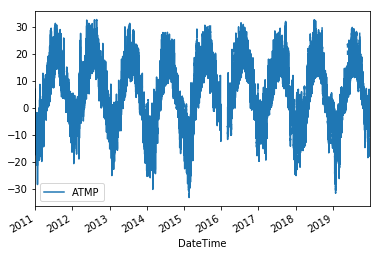

In [17]:
%matplotlib inline
df_ice_cover.plot(x = 'DateTime', y='ATMP')

### Replacing missing values in ATMP with means of past 6 windows

In [18]:
df_ice_cover['ATMP'] = df_ice_cover['ATMP'].fillna(df_ice_cover['ATMP'].rolling(6, min_periods = 1).mean())

In [19]:
df_ice_cover = df_ice_cover[['DateTime', 'ATMP']]

In [20]:
df_ice_cover.head()

,DateTime,ATMP
0,2011-01-01 00:00:00,3.3
1,2011-01-01 00:06:00,3.1
2,2011-01-01 00:12:00,3.1
3,2011-01-01 00:18:00,3.2
4,2011-01-01 00:24:00,3.2


### Dropping missing values

In [22]:
df_ice_cover = df_ice_cover.dropna()
df_ice_cover.shape

(752800, 2)

0